# Mall Customer Segmentation 

Bu proje, bir alışveriş merkezindeki müşterilerin segmentasyonunu gerçekleştirmek amacıyla yapılmıştır. Müşteri verileri kullanılarak, farklı müşteri grupları belirlenip, bu grupların özellikleri analiz edilmiştir. Amacımız, her bir müşteri segmentinin davranışlarını anlamak ve bu bilgileri pazarlama stratejilerine entegre etmektir.

## 🔗 Kaggle Veri Seti
[Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

## 🔗 Hugging Face Uygulaması
[Müşteri Segmentasyonu - Hugging Face Space](https://huggingface.co/spaces/btulftma/customer-segmentation)

## 🔗 Github
[Müşteri Segmentasyonu - Github](https://github.com/FBetulS/Mall-Customer-Segmentation-)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


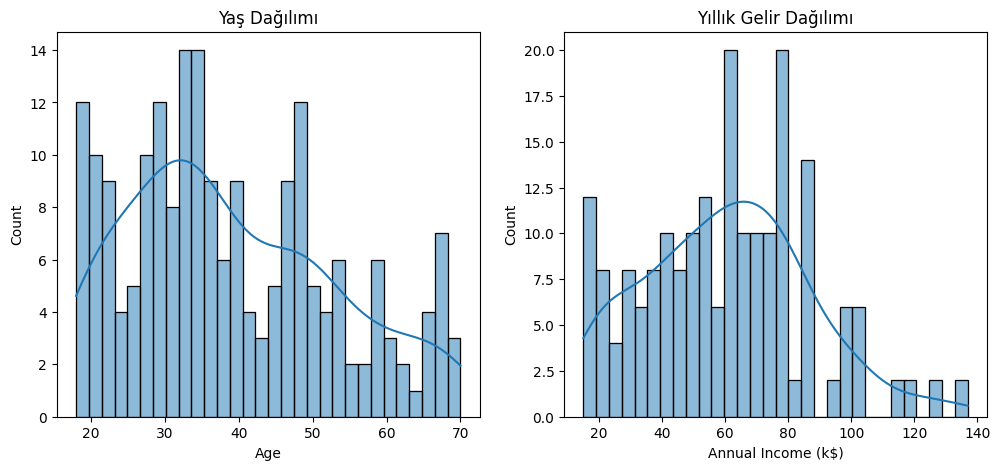

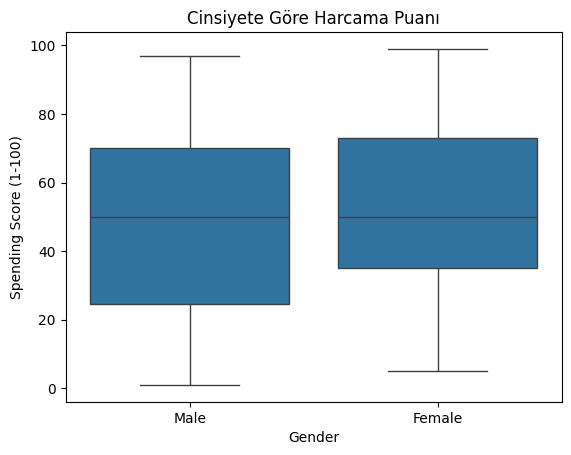

In [13]:
# Yaş ve Gelir Dağılımı
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Yaş Dağılımı')

plt.subplot(1, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Yıllık Gelir Dağılımı')
plt.show()

# Cinsiyete Göre Harcama Puanı
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Cinsiyete Göre Harcama Puanı')
plt.show()

In [15]:
# Kategorik değişkeni sayısala çevir (Gender: Male=1, Female=0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Özellik seçimi (Yaş, Yıllık Gelir, Harcama Puanı)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_

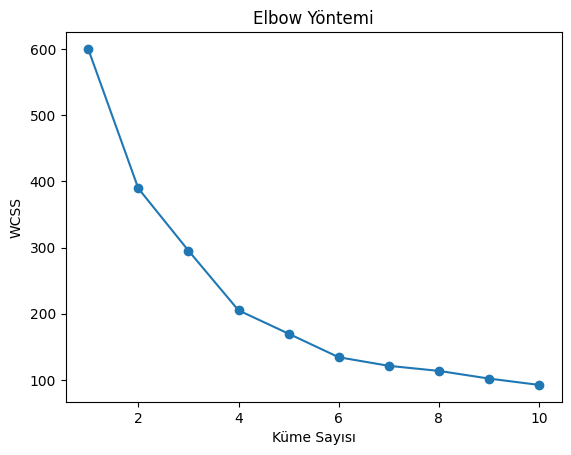

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Optimal küme sayısı için Elbow Yöntemi
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

# K-Means modeli (Optimal küme sayısı=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Kümeleme sonuçlarını dataframe'e ekle
df['Cluster'] = clusters

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_

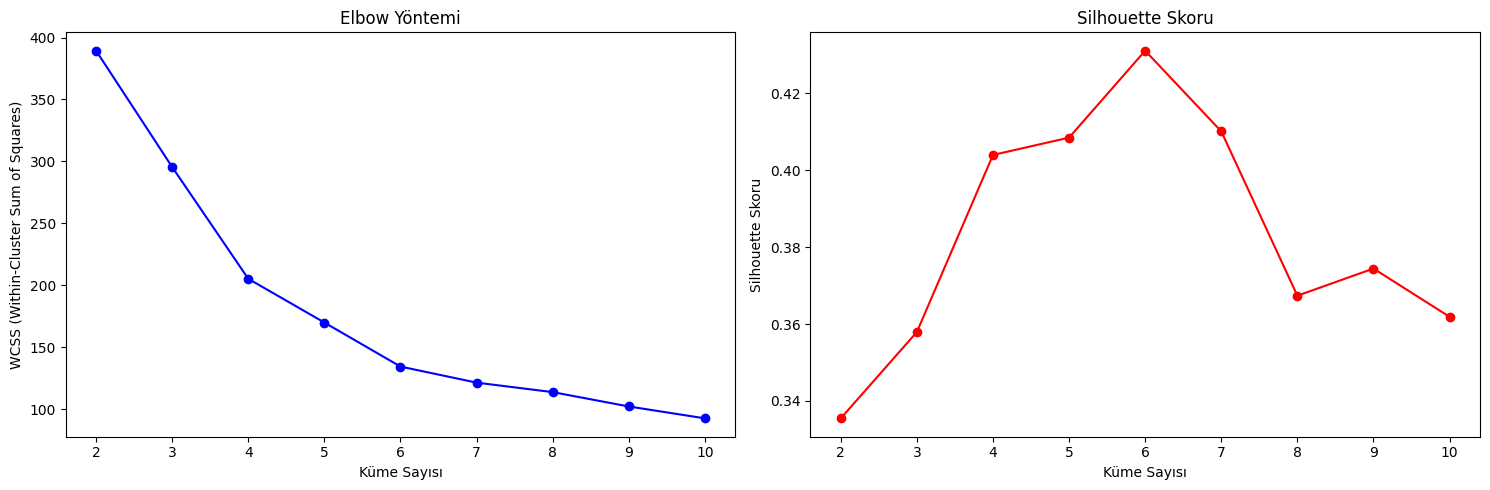

In [29]:
from sklearn.metrics import silhouette_samples

# Elbow ve Silhouette analizi için küme sayılarını belirle
k_values = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

# Elbow ve Silhouette Grafikleri
plt.figure(figsize=(15, 5))

# Elbow Grafiği
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', color='b')
plt.title('Elbow Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Silhouette Grafiği
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Skoru')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')

plt.tight_layout()
plt.show()

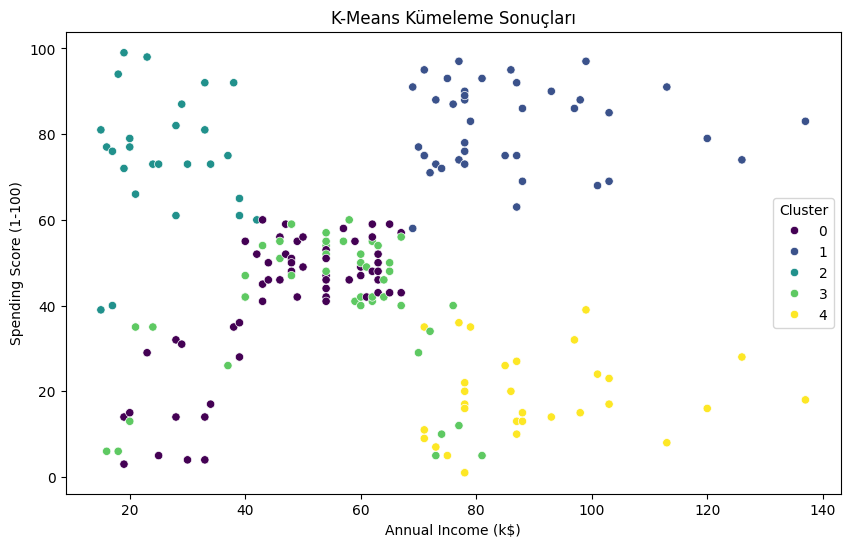

In [19]:
# Gelir vs Harcama Puanı
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    data=df, 
    palette='viridis'
)
plt.title('K-Means Kümeleme Sonuçları')
plt.show()

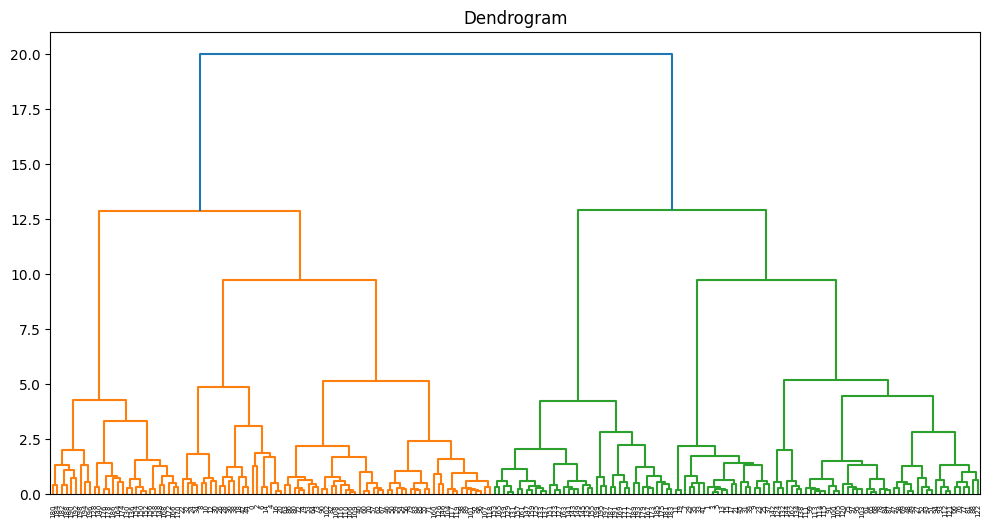

In [21]:
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=df.index)
plt.title('Dendrogram')
plt.show()

# Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

In [23]:
# DBSCAN modeli
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Gürültü (Noise) noktalarını kontrol et
print("DBSCAN Gürültü Oranı:", (df['DBSCAN_Cluster'] == -1).mean())

DBSCAN Gürültü Oranı: 0.3


In [25]:
# Silhouette Skoru
kmeans_score = silhouette_score(X_scaled, df['Cluster'])
hierarchical_score = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
print(f"K-Means Silhouette Skoru: {kmeans_score:.2f}")
print(f"Hierarchical Silhouette Skoru: {hierarchical_score:.2f}")

K-Means Silhouette Skoru: 0.41
Hierarchical Silhouette Skoru: 0.39


In [27]:
# Kümelerin özellik ortalamaları
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Kümelerin yorumlanması:
# - Küme 0: Genç, yüksek harcama, orta gelir
# - Küme 1: Orta yaş, düşük harcama, yüksek gelir
# - Küme 2: Genç, yüksek harcama, düşük gelir
# - Küme 3: Yaşlı, düşük harcama, orta gelir
# - Küme 4: Genç, orta harcama, yüksek gelir

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.431034  55.275862           47.620690   
1        161.025000  0.450000  32.875000           86.100000   
2         23.461538  0.423077  25.769231           26.115385   
3         86.377778  0.400000  26.733333           54.311111   
4        166.870968  0.516129  44.387097           89.774194   

         Spending Score (1-100)  Hierarchical_Cluster  DBSCAN_Cluster  
Cluster                                                                
0                     41.706897              1.689655        1.396552  
1                     81.525000              1.950000        3.000000  
2                     74.846154              0.307692       -0.038462  
3                     40.911111              0.533333        1.844444  
4                     18.483871              2.806452        0.354839  


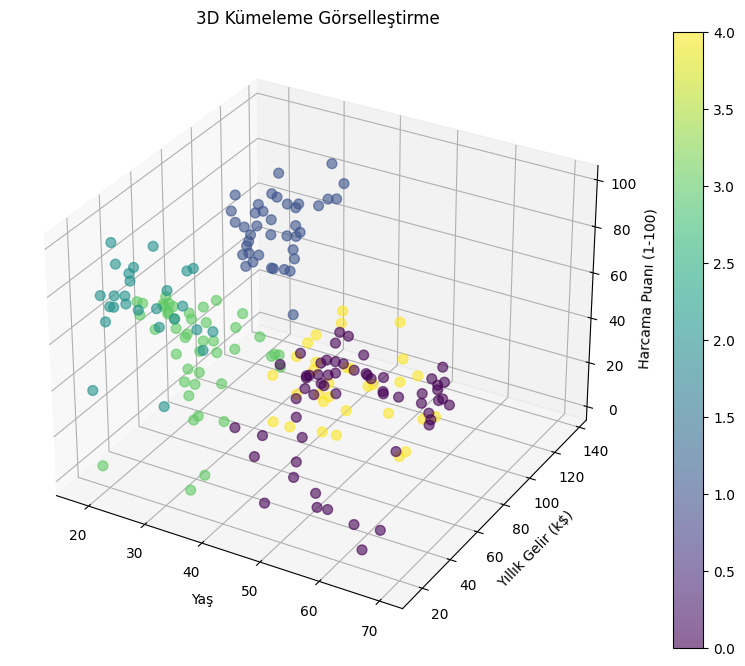

In [31]:
# 3D Görselleştirme
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Kümeleri renklerle göster
scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6
)

ax.set_xlabel('Yaş')
ax.set_ylabel('Yıllık Gelir (k$)')
ax.set_zlabel('Harcama Puanı (1-100)')
plt.title('3D Kümeleme Görselleştirme')
plt.colorbar(scatter)
plt.show()

C:\Users\BETÜL\AppData\Local\Temp\ipykernel_8352\3738501467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df, palette='viridis')
C:\Users\BETÜL\AppData\Local\Temp\ipykernel_8352\3738501467.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='viridis')
C:\Users\BETÜL\AppData\Local\Temp\ipykernel_8352\3738501467.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')


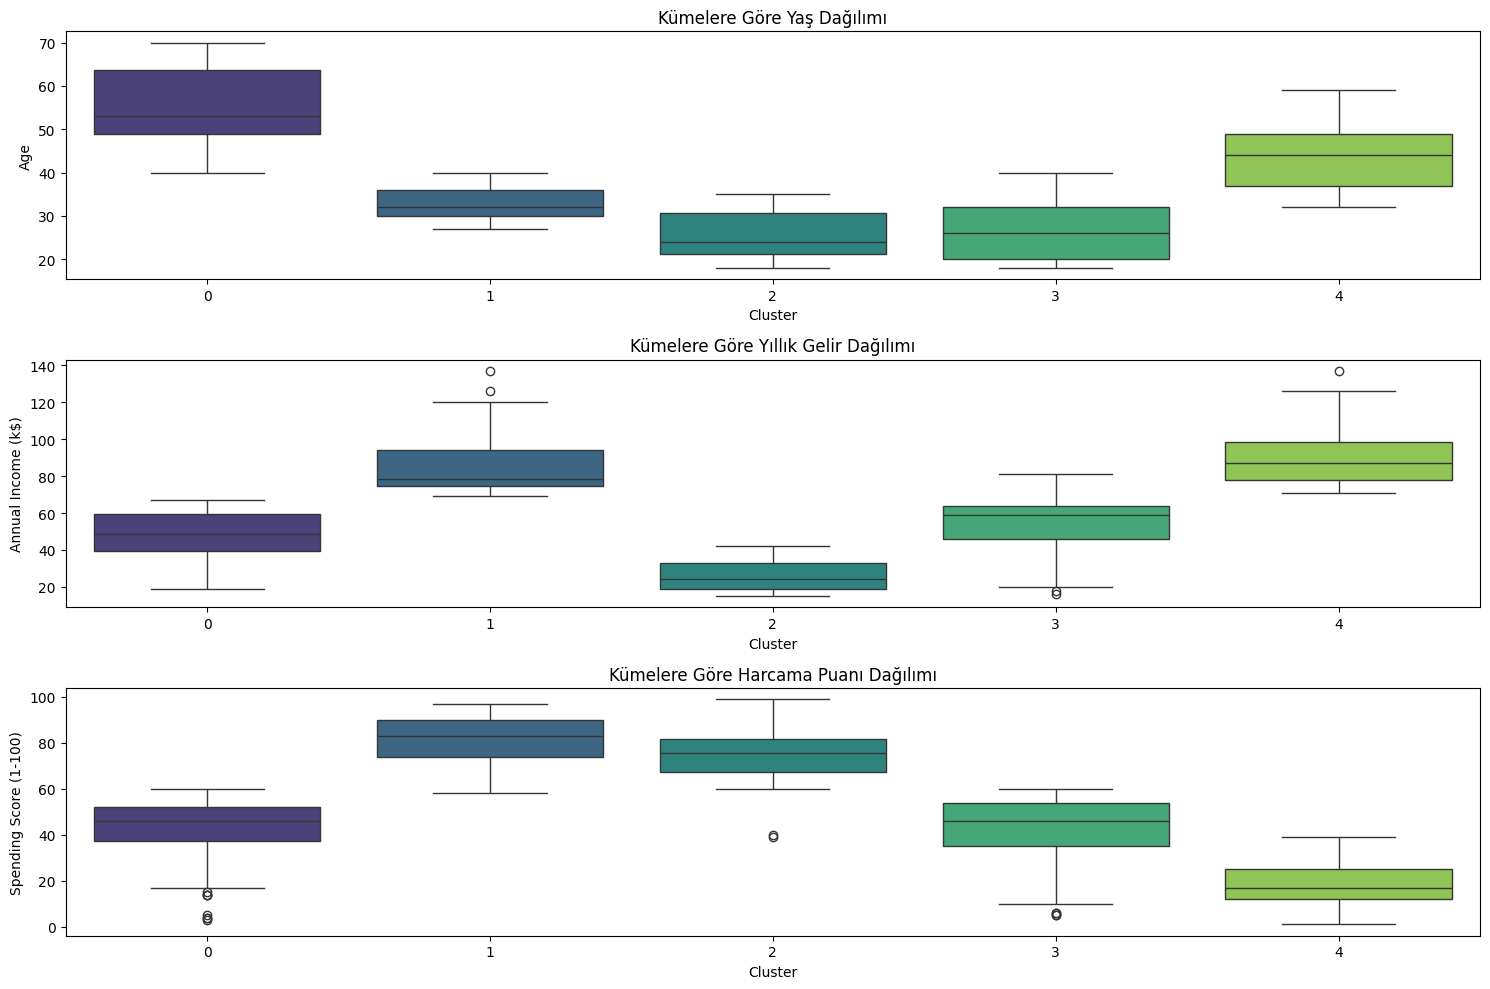

In [33]:
# Kümelere göre özellik dağılımı
plt.figure(figsize=(15, 10))

# Yaş
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Age', data=df, palette='viridis')
plt.title('Kümelere Göre Yaş Dağılımı')

# Yıllık Gelir
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Kümelere Göre Yıllık Gelir Dağılımı')

# Harcama Puanı
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Kümelere Göre Harcama Puanı Dağılımı')

plt.tight_layout()
plt.show()

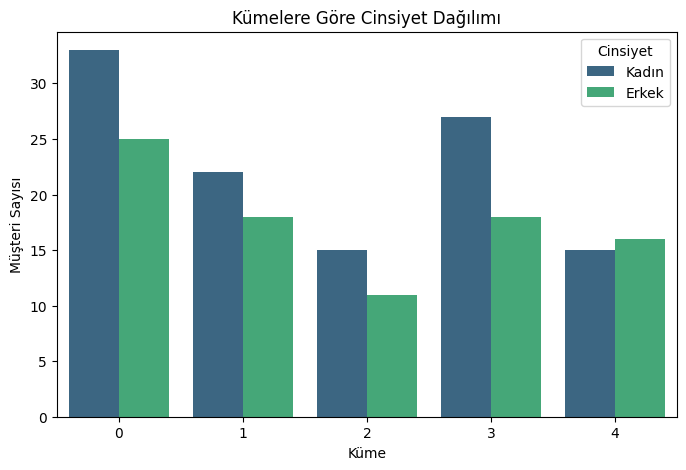

In [35]:
# Cinsiyet-Küme İlişkisi
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Gender', data=df, palette='viridis')
plt.title('Kümelere Göre Cinsiyet Dağılımı')
plt.xlabel('Küme')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Cinsiyet', labels=['Kadın', 'Erkek'])
plt.show()

C:\Users\BETÜL\AppData\Local\Temp\ipykernel_8352\1448995629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


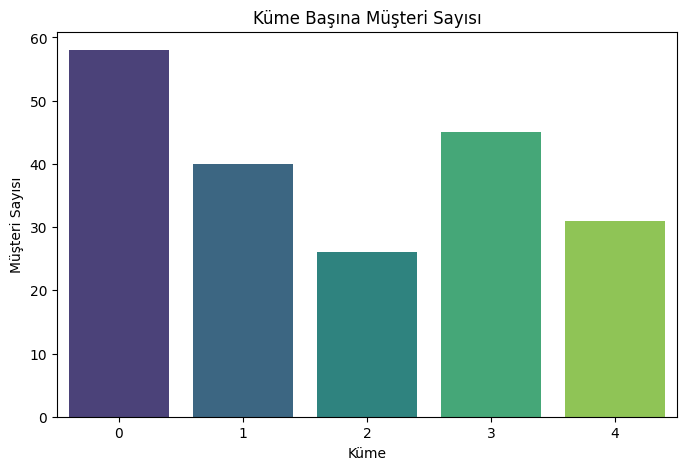

In [37]:
# Küme Dağılımı
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Küme Başına Müşteri Sayısı')
plt.xlabel('Küme')
plt.ylabel('Müşteri Sayısı')
plt.show()

Küme 0: Genç (20-35 yaş), orta gelir, yüksek harcama → Hedef Kitle.

Küme 1: Orta yaş (35-50), yüksek gelir, düşük harcama → Premium Ürünler İçin Potansiyel.

Küme 2: Genç (18-30), düşük gelir, yüksek harcama → İndirim Kampanyalarına Duyarlı.

Küme 3: Yaşlı (50+), orta gelir, düşük harcama → Sadakat Programları.

Küme 4: Genç (25-40), yüksek gelir, orta harcama → Lüks Ürünler.